In [70]:
import pandas as pd
%pylab inline
from sklearn.linear_model import LinearRegression
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
airlines=pd.read_csv('./airlines.csv')
airports=pd.read_csv('./airports.csv')
flights=pd.read_csv('./flights.csv')


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
airports.head(./)

SyntaxError: invalid syntax (<ipython-input-42-adb2b5289ffa>, line 1)

In [4]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [20]:
columns = ['DESTINATION_AIRPORT', 'ARRIVAL_DELAY']

In [38]:
flights_df = flights[columns]

In [43]:
flights_df.head()

,DESTINATION_AIRPORT,ARRIVAL_DELAY
0,SEA,-22.0
1,PBI,-9.0
2,CLT,5.0
3,MIA,-9.0
4,ANC,-21.0


In [29]:
airports_name = airports[['IATA_CODE', 'AIRPORT']]

In [44]:
airports_name.head()

,IATA_CODE,AIRPORT
0,ABE,Lehigh Valley International Airport
1,ABI,Abilene Regional Airport
2,ABQ,Albuquerque International Sunport
3,ABR,Aberdeen Regional Airport
4,ABY,Southwest Georgia Regional Airport


In [28]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [37]:
flights_df = flights_df.merge(airports_name, how='left' , left_on='DESTINATION_AIRPORT' , right_on='IATA_CODE' )

KeyError: 'DESTINATION_AIRPORT'

In [34]:
flights_df.head()

,ORIGIN_AIRPORT,ARRIVAL_DELAY,IATA_CODE,AIRPORT
0,ANC,-22.0,ANC,Ted Stevens Anchorage International Airport
1,LAX,-9.0,LAX,Los Angeles International Airport
2,SFO,5.0,SFO,San Francisco International Airport
3,LAX,-9.0,LAX,Los Angeles International Airport
4,SEA,-21.0,SEA,Seattle-Tacoma International Airport


In [46]:
print(flights_df.keys())

Index([u'DESTINATION_AIRPORT', u'ARRIVAL_DELAY'], dtype='object')


In [47]:
arr_delay_by_airport = flights_df.groupby(['DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean()

In [48]:
arr_by_airport = flights_df.groupby(['DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].count()

In [49]:
key = arr_by_airport.keys()

In [51]:
data_dict = {k:{} for k in key}

In [52]:
for k in key:
    data_dict[k]['delay_mean'] = arr_delay_by_airport[k]
    data_dict[k]['arrival'] = arr_by_airport[k]

In [53]:
x = [data_dict[k]['arrival'] for k in data_dict]
y = [data_dict[k]['delay_mean'] for k in data_dict]

In [54]:
print(data_dict)

{'10299': {'arrival': 74, 'delay_mean': 2.6486486486486487}, '14679': {'arrival': 356, 'delay_mean': -2.9831460674157304}, 'SIT': {'arrival': 1325, 'delay_mean': 2.1086792452830188}, '14674': {'arrival': 6, 'delay_mean': 17.666666666666668}, 'ELP': {'arrival': 11843, 'delay_mean': 7.2284049649582034}, 'PSE': {'arrival': 737, 'delay_mean': 10.048846675712348}, '11823': {'arrival': 29, 'delay_mean': -4.8275862068965516}, '15024': {'arrival': 21, 'delay_mean': -7.6190476190476186}, 10257: {'arrival': 692, 'delay_mean': -1.0563583815028901}, '11540': {'arrival': 58, 'delay_mean': 15.431034482758621}, 'YUM': {'arrival': 1856, 'delay_mean': 3.2591594827586206}, 'SCC': {'arrival': 832, 'delay_mean': 0.47836538461538464}, '11982': {'arrival': 18, 'delay_mean': 8.7222222222222214}, '11980': {'arrival': 3, 'delay_mean': -5.666666666666667}, 10268: {'arrival': 54, 'delay_mean': -7.6111111111111107}, 12323: {'arrival': 203, 'delay_mean': 2.3497536945812807}, 'LSE': {'arrival': 1584, 'delay_mean': 

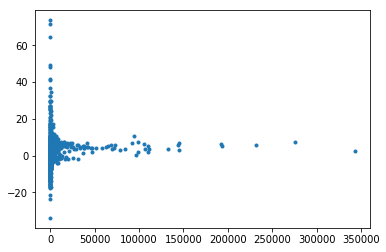

In [55]:
plot(x,y,'.')

In [56]:
x = log10([data_dict[k]['arrival'] for k in data_dict])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


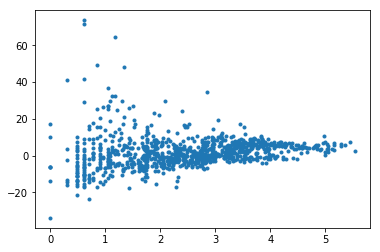

In [57]:
plot(x,y,'.')

In [58]:
type(x)

numpy.ndarray

In [59]:
type(y)

list

In [60]:
yarray = np.array(y)

In [62]:
type(yarray)

numpy.ndarray

In [63]:
np.isnan(x)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [64]:
np.isnan(yarray)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [65]:
yarray_withoutnan = yarray[~numpy.isnan(yarray)]

In [67]:
np.isnan(yarray_withoutnan)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [73]:
lm = sklearn.linear_model.LinearRegression()

In [72]:
help(sklearn.linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model

FILE
    /usr/local/lib/python2.7/site-packages/sklearn/linear_model/__init__.py

DESCRIPTION
    The :mod:`sklearn.linear_model` module implements generalized linear models. It
    includes Ridge regression, Bayesian Regression, Lasso and Elastic Net
    estimators computed with Least Angle Regression and coordinate descent. It also
    implements Stochastic Gradient Descent related algorithms.

PACKAGE CONTENTS
    base
    bayes
    cd_fast
    coordinate_descent
    huber
    least_angle
    logistic
    omp
    passive_aggressive
    perceptron
    randomized_l1
    ransac
    ridge
    sag
    sag_fast
    setup
    sgd_fast
    stochastic_gradient
    tests (package)
    theil_sen

CLASSES
    sklearn.base.BaseEstimator(__builtin__.object)
        sklearn.linear_model.huber.HuberRegressor(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
        sklearn.

In [74]:
lm.fit(x,yarray_withoutnan)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [75]:
x = x[~numpy.isnan(x)]

In [77]:
lm.fit(x,yarray_withoutnan)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [78]:
x = x[numpy.isfinite(x)]

In [79]:
xwithoutnan = x[~numpy.isnan(x)]

In [80]:
yarray = yarray[numpy.isfinite(yarray)]

In [81]:
ywithoutnan = yarray[~numpy.isnan(yarray)]

In [82]:
lm.fit(xwithoutnan,ywithoutnan)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 929]

In [83]:
lm.fit(xwithoutnan.reshape(len(xwithoutnan),1),ywithoutnan)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
slope,intercept = np.polyfit(xwithoutnan,ywithoutnan,1)

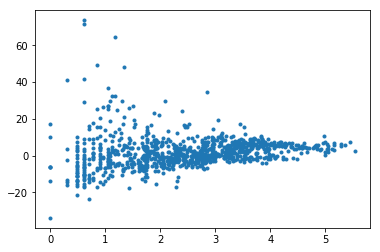

In [85]:
plt.plot(xwithoutnan,ywithoutnan,'.')

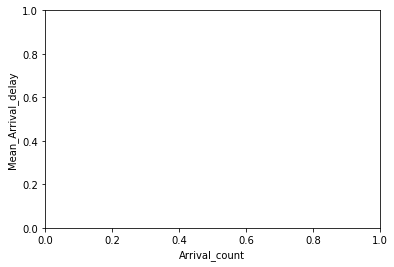

In [86]:
plt.xlabel('Arrival_count')
plt.ylabel('Mean_Arrival_delay')

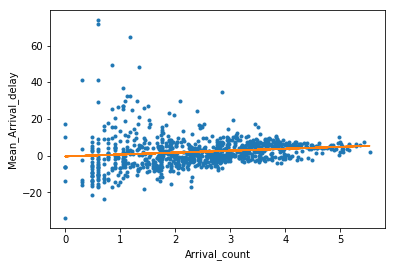

In [89]:
plt.plot(xwithoutnan,ywithoutnan,'.')
plt.xlabel('Arrival_count')
plt.ylabel('Mean_Arrival_delay')
l = plt.plot(xwithoutnan, slope*xwithoutnan + intercept, '-')
